In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

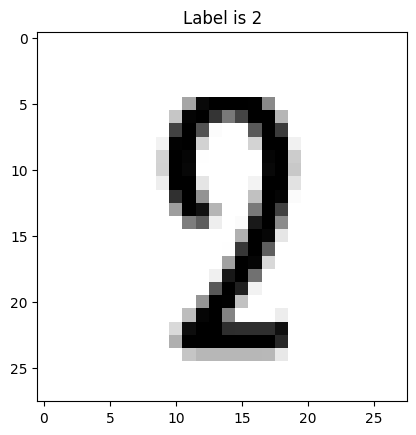

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('TMNIST_Data.csv')

#drop 'names'
df = df.drop('names', axis=1)

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    # The first column is the label
    label = row[0]

    # The rest of columns are pixels
    pixels = row[1:].values

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray_r')  # Use 'gray_r' to invert the colors
    plt.show()

    if index == 0: break  # This stops the loop, I just want to see one


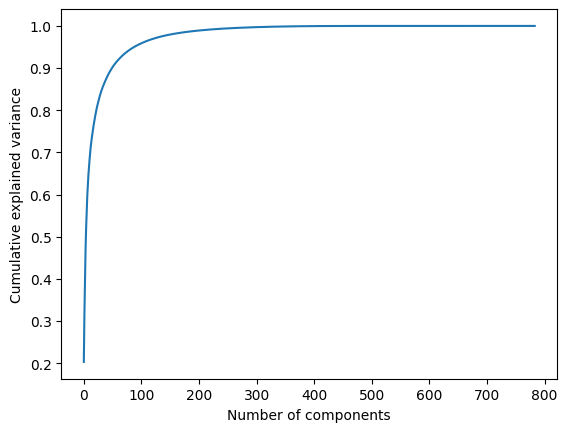

In [4]:
from sklearn.decomposition import PCA

# Separate the labels and the data
X = df.drop('labels', axis=1).values
y = df['labels'].values

# Perform PCA
pca = PCA()
pca.fit(X)

# Calculate the cumulative sum of explained variance ratios
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
num_components_95 = np.argmax(cumulative_variance >= 0.80) + 1

#print(f'Cantidad de autovectores de representación al 95 %: {num_components_95}')

# Plot the cumulative explained variance ratio
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [5]:
# Get the indices of the components that explain at least 95% of the variance
components_95 = pca.components_[:num_components_95]

# Get the unique columns that contribute to these components
unique_columns_95 = np.unique(np.where(components_95 != 0)[1])

# Imprimir la cantidad de columnas responsables de generar las componentes al 95%
# ERRONEO: print(f'Columnas responsables de generar las componentes al 95%: {unique_columns_95}')
print(f'Cantidad de columnas: {len(unique_columns_95)}')

components_95

Cantidad de columnas: 702


array([[-1.71769365e-19, -2.49800181e-16,  6.66133815e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.28682268e-19,  6.93889390e-17,  1.94289029e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.93035522e-19,  1.38777878e-17, -2.77555756e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.66450231e-18, -5.55111512e-17,  6.66133815e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.45897661e-18, -0.00000000e+00,  3.60822483e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.05398099e-17,  3.33066907e-16,  1.44328993e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

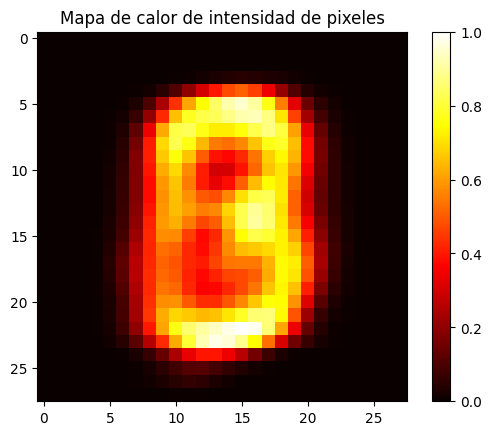

In [6]:
# Sum all the rows for each pixel
pixel_sums = df.drop('labels', axis=1).sum(axis=0).values

# Normalize the pixel sums
pixel_sums_normalized = pixel_sums / pixel_sums.max()

# Reshape the normalized pixel sums into a 28x28 array
heatmap_data = pixel_sums_normalized.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de intensidad de pixeles')
plt.show()

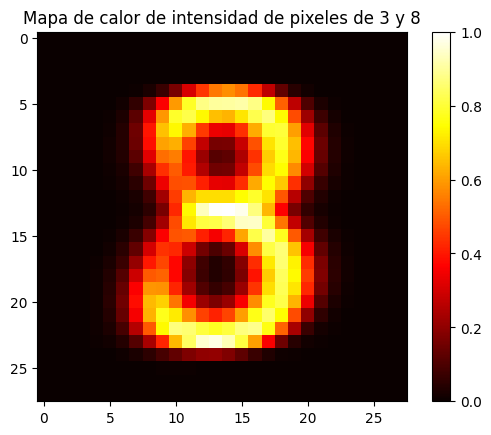

In [7]:
# only 3 or 8
df_3_8 = df[(df['labels'] == 3) | (df['labels'] == 8)]

# Sum all the rows for each pixel
pixel_sums = df_3_8.drop('labels', axis=1).sum(axis=0).values

# Normalize the pixel sums
pixel_sums_normalized = pixel_sums / pixel_sums.max()

# Reshape the normalized pixel sums into a 28x28 array
heatmap_data = pixel_sums_normalized.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de intensidad de pixeles de 3 y 8')
plt.show()

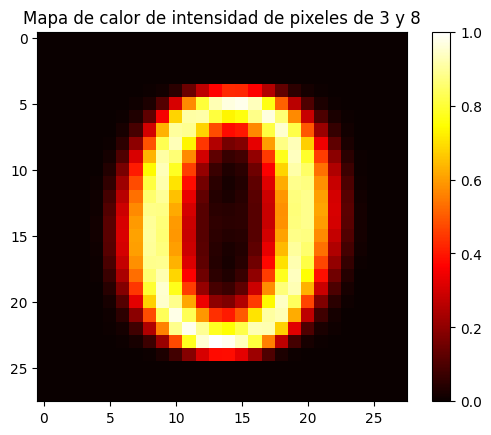

In [8]:
# only 3 or 8
df_3_8 = df[df['labels'] == 0]

# Sum all the rows for each pixel
pixel_sums = df_3_8.drop('labels', axis=1).sum(axis=0).values

# Normalize the pixel sums
pixel_sums_normalized = pixel_sums / pixel_sums.max()

# Reshape the normalized pixel sums into a 28x28 array
heatmap_data = pixel_sums_normalized.reshape((28, 28))

# Plot the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de calor de intensidad de pixeles de 3 y 8')
plt.show()

In [9]:
#amount of pixels that summed up to 0
zero_sum_pixels = np.sum(pixel_sums == 0)
print(f'Cantidad de píxeles que sumaron 0: {zero_sum_pixels}')

Cantidad de píxeles que sumaron 0: 253


In [10]:
# columnas que no sumaron 0
non_zero_sum_pixels = np.sum(pixel_sums != 0)
print(f'Cantidad de píxeles que no sumaron 0: {non_zero_sum_pixels}')
#imprimir esas columnas
cols_non_zero_sum = np.where(pixel_sums != 0)[0]
print(f'Columnas que no sumaron 0: {np.where(pixel_sums != 0)[0]}')

Cantidad de píxeles que no sumaron 0: 531
Columnas que no sumaron 0: [ 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 366 36

In [11]:
#cantidad de pixeles que promediaron 1
one_avg_pixels = np.sum(pixel_sums_normalized == 255)
print(f'Cantidad de píxeles que promediaron 255: {one_avg_pixels}')

Cantidad de píxeles que promediaron 255: 0


**Acá abajo habría que agregar también algún criterio tipo 'tomar pixeles del medio' vs random, o así para evaluar si es mejor o no**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# dataframe con imágenes correspondientes a los dígitos 0 o 1
df_0_1 = df[(df['labels'] == 0) | (df['labels'] == 1)]

# cuántas muestras se tienen y si está balanceado
count_0 = df_0_1[df_0_1['labels'] == 0].shape[0]
count_1 = df_0_1[df_0_1['labels'] == 1].shape[0]
print(f'Cantidad de muestras del dígito 0: {count_0}')
print(f'Cantidad de muestras del dígito 1: {count_1}')

# train y test
X_0_1 = df_0_1.drop('labels', axis=1).values
y_0_1 = df_0_1['labels'].values
X_train, X_test, y_train, y_test = train_test_split(X_0_1, y_0_1, test_size=0.2, random_state=42)

# KNN en los datos de train, con pocos atributos
# distintos conjuntos de 3 atributos creando 50 distintos para 3, 5, 7, 9, 11 atributos

sets_atributos = np.random.choice(range(1, 784), (50, 3), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 784), (50, 5), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 784), (50, 7), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 784), (50, 9), replace=False).tolist()
sets_atributos += np.random.choice(range(1, 784), (50, 11), replace=False).tolist()

print(sets_atributos[:5])

print(X_train.shape)

knn = KNeighborsClassifier(n_neighbors=3)
preds = []

for attributes in sets_atributos:
    knn.fit(X_train[:, attributes], y_train)
    y_pred = knn.predict(X_test[:, attributes])
    accuracy = accuracy_score(y_test, y_pred)
    preds.append((attributes, accuracy))
    print(f'Atributos: {attributes}, Exactitud: {accuracy}')

# Atributos con mejor exactitud
best_attributes = max(preds, key=lambda x: x[1])[0]
print(f'Mejores atributos: {best_attributes}, Exactitud: {max(preds, key=lambda x: x[1])[1]}')

Cantidad de muestras del dígito 0: 2990
Cantidad de muestras del dígito 1: 2990
[[124, 509, 478], [157, 614, 34], [595, 227, 11], [13, 162, 773], [60, 46, 83]]
(4784, 784)
Atributos: [124, 509, 478], Exactitud: 0.637123745819398
Atributos: [157, 614, 34], Exactitud: 0.7424749163879598
Atributos: [595, 227, 11], Exactitud: 0.6839464882943144
Atributos: [13, 162, 773], Exactitud: 0.5033444816053512
Atributos: [60, 46, 83], Exactitud: 0.5175585284280937
Atributos: [483, 344, 635], Exactitud: 0.9147157190635451
Atributos: [763, 302, 184], Exactitud: 0.6630434782608695
Atributos: [591, 260, 712], Exactitud: 0.7993311036789298
Atributos: [749, 512, 674], Exactitud: 0.947324414715719
Atributos: [66, 357, 771], Exactitud: 0.8486622073578596
Atributos: [581, 756, 298], Exactitud: 0.8411371237458194
Atributos: [566, 401, 487], Exactitud: 0.9423076923076923
Atributos: [704, 271, 163], Exactitud: 0.9372909698996655
Atributos: [739, 289, 338], Exactitud: 0.8193979933110368
Atributos: [599, 381, 764

" # Perform KNN on the entire dataset without filtering zero-sum pixels\nknn_all = KNeighborsClassifier(n_neighbors=3)\nknn_all.fit(X_train, y_train)\ny_pred_all = knn_all.predict(X_test)\naccuracy_all = accuracy_score(y_test, y_pred_all)\nprint(f'Exactitud sobre todos los píxeles: {accuracy_all}')\n\n# Perform KNN on the dataset filtered to exclude zero-sum pixels\nX_train_filtered = X_train[:, cols_non_zero_sum]\nX_test_filtered = X_test[:, cols_non_zero_sum]\n\nknn_filtered = KNeighborsClassifier(n_neighbors=3)\nknn_filtered.fit(X_train_filtered, y_train)\ny_pred_filtered = knn_filtered.predict(X_test_filtered)\naccuracy_filtered = accuracy_score(y_test, y_pred_filtered)\nprint(f'Exactitud sobre los píxeles filtrados: {accuracy_filtered}') "

In [13]:
from collections import defaultdict

# Diccionario para almacenar las exactitudes según la cantidad de atributos
accuracy_by_num_attributes = defaultdict(list)

# Calcular la exactitud promedio según la cantidad de atributos
for attributes, accuracy in preds:
    num_attributes = len(attributes)
    accuracy_by_num_attributes[num_attributes].append(accuracy)

# Calcular el promedio de exactitud para cada cantidad de atributos
average_accuracy_by_num_attributes = {num_attributes: np.mean(accuracies) for num_attributes, accuracies in accuracy_by_num_attributes.items()}

# Imprimir los resultados
for num_attributes, avg_accuracy in average_accuracy_by_num_attributes.items():
    print(f'Cantidad de atributos: {num_attributes}, Exactitud promedio: {avg_accuracy}')

Cantidad de atributos: 3, Exactitud promedio: 0.7382608695652172
Cantidad de atributos: 5, Exactitud promedio: 0.8157692307692308
Cantidad de atributos: 7, Exactitud promedio: 0.8879765886287626
Cantidad de atributos: 9, Exactitud promedio: 0.8871404682274248
Cantidad de atributos: 11, Exactitud promedio: 0.9411371237458194


Número de vecinos (k): Define cuántos vecinos considerar para la predicción.

**No usemos ninguna otra metrica dijo aylu**

In [17]:
# d. Comparar modelos de KNN utilizando distintos atributos y distintos valores de k
k_values = [1, 3, 5, 10, 20, 50]
best_accuracy = 0
best_k = 0
best_attributes = []

for k in k_values:
    for attributes in sets_atributos:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train[:, attributes], y_train)
        y_pred = knn.predict(X_test[:, attributes])
        accuracy = accuracy_score(y_test, y_pred)
        print(f'k: {k}, Atributos: {attributes}, Exactitud: {accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_attributes = attributes

print(f'Mejor modelo - k: {best_k}, Atributos: {best_attributes}, Exactitud: {best_accuracy}')

k: 1, Atributos: [124, 509, 478], Exactitud: 0.5501672240802675
k: 1, Atributos: [157, 614, 34], Exactitud: 0.729933110367893
k: 1, Atributos: [595, 227, 11], Exactitud: 0.4866220735785953
k: 1, Atributos: [13, 162, 773], Exactitud: 0.5175585284280937
k: 1, Atributos: [60, 46, 83], Exactitud: 0.5175585284280937
k: 1, Atributos: [483, 344, 635], Exactitud: 0.9055183946488294
k: 1, Atributos: [763, 302, 184], Exactitud: 0.6505016722408027
k: 1, Atributos: [591, 260, 712], Exactitud: 0.7767558528428093
k: 1, Atributos: [749, 512, 674], Exactitud: 0.9381270903010034
k: 1, Atributos: [66, 357, 771], Exactitud: 0.5167224080267558
k: 1, Atributos: [581, 756, 298], Exactitud: 0.8344481605351171
k: 1, Atributos: [566, 401, 487], Exactitud: 0.9306020066889632
k: 1, Atributos: [704, 271, 163], Exactitud: 0.9339464882943144
k: 1, Atributos: [739, 289, 338], Exactitud: 0.7959866220735786
k: 1, Atributos: [599, 381, 764], Exactitud: 0.7048494983277592
k: 1, Atributos: [760, 743, 692], Exactitud: 0.5

#### Otras métricas para testear

**Precisión (Precision) SUMA**: Proporción de predicciones positivas correctas sobre el total de predicciones positivas. Indica la exactitud de las predicciones positivas del modelo.

Sensibilidad (Recall): Proporción de verdaderos positivos detectados sobre el total de positivos reales. Mide la capacidad del modelo para encontrar todos los casos positivos.

F1-Score: Media armónica entre la precisión y la sensibilidad. Es útil cuando hay un desequilibrio entre clases y proporciona un equilibrio entre ambas métricas.

**Matriz de confusión: DIJO AYLU QUE PARA EL D) SI O SI :)** Tabla que resume las predicciones correctas e incorrectas clasificadas por cada clase. Ayuda a visualizar el rendimiento del modelo en detalle.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Separar el conjunto de datos en desarrollo (dev) y validación (held-out)
X_dev, X_held_out, y_dev, y_held_out = train_test_split(X, y, test_size=0.2, random_state=42)

# separar el conjunto de desarrollo en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42)

# Probar con distintas profundidades
best_depth = 0
best_accuracy = 0

for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Depth: {depth}, Accuracy: {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f'Mejor profundidad: {best_depth}, Mejor exactitud: {best_accuracy}')
# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store accuracy for each fold
fold_accuracies = []

# Perform K-Fold Cross Validation
for train_index, val_index in kf.split(X_dev):
    X_train_fold, X_val_fold = X_dev[train_index], X_dev[val_index]
    y_train_fold, y_val_fold = y_dev[train_index], y_dev[val_index]
    
    # Train the Decision Tree Classifier
    dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    dt.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred_fold = dt.predict(X_val_fold)
    
    # Calculate accuracy
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    fold_accuracies.append(accuracy_fold)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(fold_accuracies)
print(f'Average accuracy across all folds: {avg_accuracy}')

Depth: 1, Accuracy: 0.19627926421404682
Depth: 2, Accuracy: 0.3710284280936455
Depth: 3, Accuracy: 0.5863294314381271
Depth: 4, Accuracy: 0.7880434782608695
Depth: 5, Accuracy: 0.8275501672240803
Depth: 6, Accuracy: 0.8695652173913043
Depth: 7, Accuracy: 0.8946488294314381
Depth: 8, Accuracy: 0.9115802675585284
Depth: 9, Accuracy: 0.9195234113712375
Depth: 10, Accuracy: 0.9247491638795987
Mejor profundidad: 10, Mejor exactitud: 0.9247491638795987
Average accuracy across all folds: 0.9263795986622074


In [21]:
# Probar con distintas profundidades y min_samples_split
best_depth = 0
best_accuracy = 0
best_min_samples_split = 0

for min_samples_split in [2, 5, 10]:
    for depth in range(1, 11):
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=min_samples_split, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        print(f'min_samples_split: {min_samples_split}, Depth: {depth}, Accuracy: {accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_min_samples_split = min_samples_split

print(f'Mejor min_samples_split: {best_min_samples_split}, Mejor profundidad: {best_depth}, Mejor exactitud: {best_accuracy}')

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store accuracy for each fold
fold_accuracies = []

# Perform K-Fold Cross Validation
for train_index, val_index in kf.split(X_dev):
    X_train_fold, X_val_fold = X_dev[train_index], X_dev[val_index]
    y_train_fold, y_val_fold = y_dev[train_index], y_dev[val_index]
    
    # Train the Decision Tree Classifier with the best parameters
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, min_samples_split=best_min_samples_split, random_state=42)
    dt.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred_fold = dt.predict(X_val_fold)
    
    # Calculate accuracy
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    fold_accuracies.append(accuracy_fold)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(fold_accuracies)
print(f'Average accuracy across all folds: {avg_accuracy}')


min_samples_split: 2, Depth: 1, Accuracy: 0.19627926421404682
min_samples_split: 2, Depth: 2, Accuracy: 0.37165551839464883
min_samples_split: 2, Depth: 3, Accuracy: 0.5921822742474916
min_samples_split: 2, Depth: 4, Accuracy: 0.7987040133779264
min_samples_split: 2, Depth: 5, Accuracy: 0.8288043478260869
min_samples_split: 2, Depth: 6, Accuracy: 0.868938127090301
min_samples_split: 2, Depth: 7, Accuracy: 0.8967391304347826
min_samples_split: 2, Depth: 8, Accuracy: 0.9218227424749164
min_samples_split: 2, Depth: 9, Accuracy: 0.925376254180602
min_samples_split: 2, Depth: 10, Accuracy: 0.9291387959866221
min_samples_split: 5, Depth: 1, Accuracy: 0.19627926421404682
min_samples_split: 5, Depth: 2, Accuracy: 0.37165551839464883
min_samples_split: 5, Depth: 3, Accuracy: 0.5921822742474916
min_samples_split: 5, Depth: 4, Accuracy: 0.7987040133779264
min_samples_split: 5, Depth: 5, Accuracy: 0.8288043478260869
min_samples_split: 5, Depth: 6, Accuracy: 0.868938127090301
min_samples_split: 5, 

Tipo este grafico hay que usar para ir notando cuando hacemos overfitting (sobre ajuste)

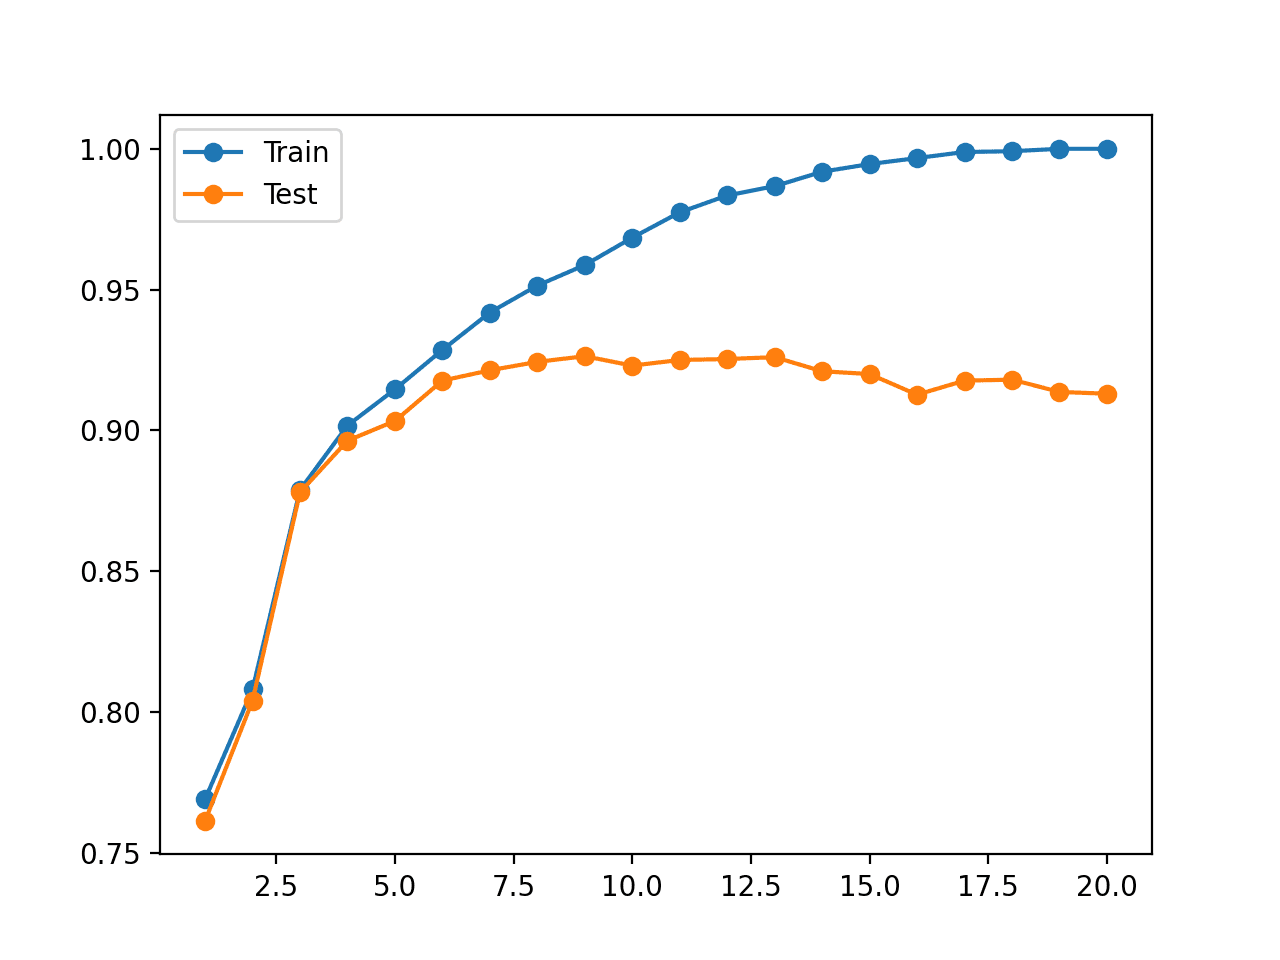